In [1]:
import networkx as nx
from evsim.classes.flowsim_dataset import FlowSimDataset
import matplotlib.colors as mcolors
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("darkgrid")

/home/olimar/miniconda3/envs/cta_matsim/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = FlowSimDataset(
    "/home/olimar/github_repos/EvMatsim/contribs/ev/scenario_examples/utah_flow_scenario_example/utahnetwork.xml",
    "/home/olimar/github_repos/EvMatsim/contribs/ev/scenario_examples/utah_flow_scenario_example/utahcounts.xml",
    100,
)

In [3]:
# cluster_path = "/home/olimar/github_repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/gradient_flow_matching_results/0421153345_nclusters_100_nsamples_1_utahevnetwork/clusters.txt"
cluster_path = "/home/olimar/github_repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0421171212_nclusters_500_nsamples_1_utahnetwork/clusters.txt"

In [4]:
clusters = {}

with open(cluster_path, "r") as f:
    for line in f.readlines():
        key,vals = line.strip().split(":")
        vals = vals.split(",")[:-1]
        vals = [dataset.node_mapping[v] for v in vals]
        clusters[key] = vals

clusters

{'0': [2725, 3139, 3140, 3862, 3863, 3864],
 '1': [227,
  605,
  756,
  757,
  758,
  1017,
  1018,
  1019,
  1020,
  1388,
  1980,
  1981,
  1982,
  1983,
  2088,
  2089,
  2311,
  2321,
  2322,
  2757,
  3346,
  3456,
  3558,
  3560,
  4000],
 '2': [128,
  129,
  130,
  368,
  765,
  766,
  767,
  812,
  813,
  814,
  815,
  817,
  2382,
  3367,
  3385,
  3386,
  3405,
  3406],
 '3': [0,
  447,
  448,
  454,
  455,
  458,
  461,
  462,
  463,
  464,
  1721,
  1722,
  1754,
  1757,
  1779,
  1780,
  4223],
 '4': [1901, 2246, 2247, 2249, 3206, 3207],
 '5': [889, 2859, 3744, 3745],
 '6': [188, 348],
 '7': [93,
  95,
  416,
  2436,
  2437,
  2438,
  2439,
  3897,
  3898,
  3899,
  3900,
  3901,
  3902,
  3903,
  3904,
  3905,
  3906,
  3907,
  3908,
  3909,
  3910,
  3911,
  3912,
  3913,
  3914],
 '8': [176],
 '9': [108,
  170,
  1455,
  1456,
  2197,
  2198,
  2199,
  2200,
  2201,
  2478,
  2479,
  2735,
  2921,
  2945,
  2946,
  3043,
  3046,
  3927],
 '10': [2482, 3268, 3275, 3794, 

In [5]:
dataset.target_graph

Data(x=[4235, 1], pos=[4235, 2], edge_index=[2, 5236], edge_attr=[5236, 24])

In [6]:
dataset.target_graph.pos.shape

torch.Size([4235, 2])

In [7]:
edge_idx = dataset.target_graph.edge_index.t().numpy()
pos = dataset.target_graph.pos.numpy()
nx_graph = nx.Graph()
nx_graph.add_edges_from(edge_idx)

In [8]:
print(nx_graph)

Graph with 4235 nodes and 4695 edges


In [9]:
# Generate a list of distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
color_cycle = itertools.cycle(colors)

# Map node -> color
node_color_map = {}

for cluster_id, nodes in clusters.items():
    color = next(color_cycle)
    for node in nodes:
        node_color_map[node] = color

node_colors = [node_color_map.get(node, 'gray') for node in nx_graph.nodes()]

In [10]:
pos

array([[-14436919. ,   3986161.2],
       [-14391948. ,   3981505.5],
       [-14391984. ,   3981558. ],
       ...,
       [-14440726. ,   3988598.2],
       [-14445022. ,   3987458.2],
       [-14445020. ,   3987496.8]], dtype=float32)

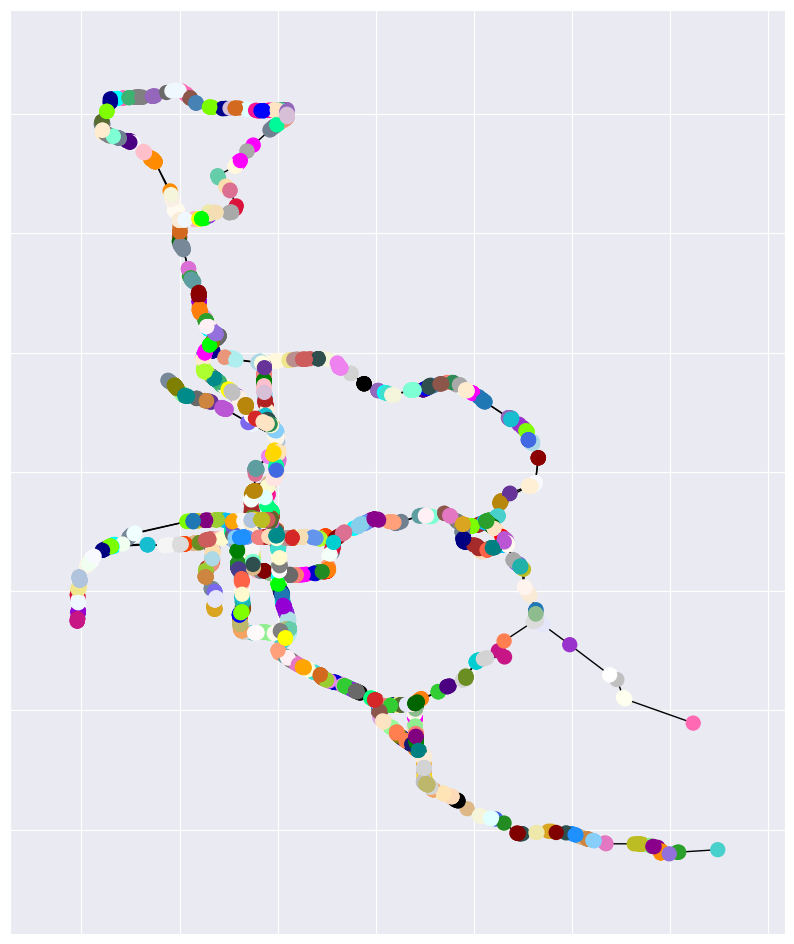

In [11]:

plt.figure(figsize=(10,12))
nx.draw_networkx(nx_graph, pos, with_labels=False, node_color=node_colors, node_size=100)

In [12]:
df = pd.read_csv("/home/olimar/github_repos/EvMatsim/example_output/ITERS/it.0/0.countscompare.txt", sep="\t")

In [13]:
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,100,40001,1,737,127,4.803,0.828,29.349
1,100,40001,2,754,86,7.767,0.886,32.595
2,100,40001,3,1047,75,12.960,0.928,41.038
3,100,40001,4,1403,84,15.702,0.940,48.373
4,100,40001,5,941,150,5.273,0.841,33.867


In [14]:
optimized_hour_sum = df.groupby("Hour")["Count volumes"].sum()

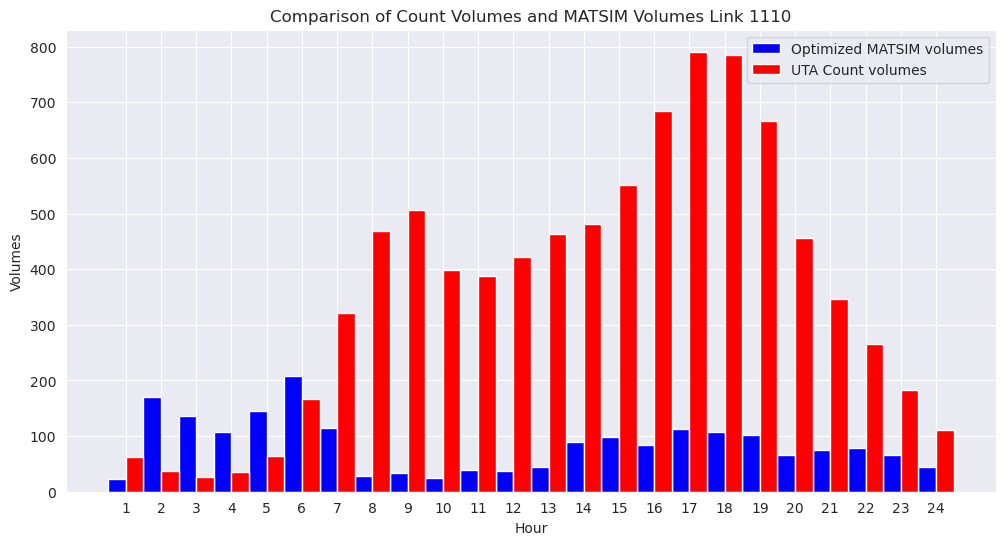

In [15]:
link = 1110
df_link = df[df["Link Id"] == link]

unique_hours = pd.unique(df_link["Hour"])
bar_width = 0.5  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))

plt.bar(
    r1, df_link["MATSIM volumes"], color="blue", width=bar_width, label="Optimized MATSIM volumes"
)
plt.bar(
    r2, df_link["Count volumes"], color="red", width=bar_width, label="UTA Count volumes"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.title(f"Comparison of Count Volumes and MATSIM Volumes Link {link}")
plt.xticks([r + (bar_width / 2) for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()

In [16]:
# Step 1: Extract link error metrics
# Aggregate by mean error per Link Id
error_df = (
    df.groupby("Link Id")[["Relative Error", "Normalized Relative Error"]]
    .mean()
    .reset_index()
)

# Convert to dictionary (now Link Id is unique)
error_dict = error_df.set_index("Link Id").to_dict("index")

error_dict = error_df.set_index("Link Id").to_dict("index")

# Step 2: Build edge-to-link mapping (assuming 1-to-1)
# If `Link Id` matches edge index in `dataset.target_graph`, this works:
edge_index = dataset.target_graph.edge_index.t().numpy()
link_ids = [i for i in range(edge_index.shape[0])]  # Placeholder — adjust if you have true mapping

# Step 3: Create edge color or weight map
edge_colors = {}
edge_widths = []

for idx, (u, v) in enumerate(edge_index):
    link_id = idx  # or use real mapping here
    if link_id in error_dict:
        rel_error = error_dict[link_id]["Relative Error"]
        norm_rel_error = error_dict[link_id]["Normalized Relative Error"]
        edge_colors[(u, v)] = norm_rel_error  # Or use rel_error
        edge_widths.append(1 + rel_error)   # Thicker lines for higher error
    # else:
    #     edge_colors[(u, v)] = 0.5
    #     edge_widths.append(1)

edge_colors

{(2219, 2882): 0.8652500000000001,
 (262, 2219): 0.3861666666666667,
 (1144, 1145): 1.0,
 (4200, 4199): 0.6693333333333333,
 (847, 850): 0.6361666666666667,
 (2019, 2031): 0.9719583333333333,
 (711, 3151): 0.49062500000000003,
 (3814, 2482): 0.7947083333333333,
 (948, 3190): 0.999875,
 (1866, 1865): 0.9703750000000001,
 (2705, 2706): 0.4892916666666667,
 (1866, 3273): 0.4407083333333333,
 (3273, 1866): 0.8875000000000001,
 (2772, 2771): 0.5384166666666667,
 (1765, 531): 0.5745833333333333,
 (3298, 3293): 0.6918333333333333,
 (702, 3852): 0.8383333333333334,
 (3853, 3300): 0.9740833333333333,
 (67, 3287): 0.7550833333333333,
 (396, 3288): 0.7287083333333334,
 (3284, 4032): 0.5288333333333334,
 (4060, 383): 0.5795833333333333,
 (2648, 3546): 0.5790833333333333,
 (3848, 4087): 0.78225,
 (1539, 1542): 0.524625,
 (4210, 1285): 0.5533750000000001,
 (1542, 1029): 0.47075,
 (2106, 4204): 1.0,
 (1537, 3364): 0.6710416666666666,
 (1546, 1548): 0.7499583333333333,
 (3660, 1184): 0.822624999999999

In [18]:

# Step 4: Plot using edge color or width
plt.figure(figsize=(12, 14))
# Filter edges to only include those present in edge_colors
filtered_edges = [(u, v) for u, v in nx_graph.edges() if (u, v) in edge_colors]

# Extract edge colors and widths for filtered edges
filtered_edge_widths = [edge_widths[list(nx_graph.edges()).index((u, v))] for u, v in filtered_edges]
filtered_edge_widths = [edge_widths[idx] for idx, (u, v) in enumerate(nx_graph.edges()) if (u, v) in edge_colors]

nx.draw_networkx(
    nx_graph,
    pos=dataset.target_graph.pos.numpy(),
    with_labels=False,
    node_color="gray",
    edgelist=filtered_edges,
    edge_color=filtered_edge_colors,
    edge_cmap=plt.cm.viridis,
    width=filtered_edge_widths,
    node_size=10,
)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Normalized Relative Error")
plt.title("Network with Edges Colored by Normalized Relative Error")
plt.show()


IndexError: list index out of range

<Figure size 1200x1400 with 0 Axes>

ValueError: RGBA sequence should have length 3 or 4

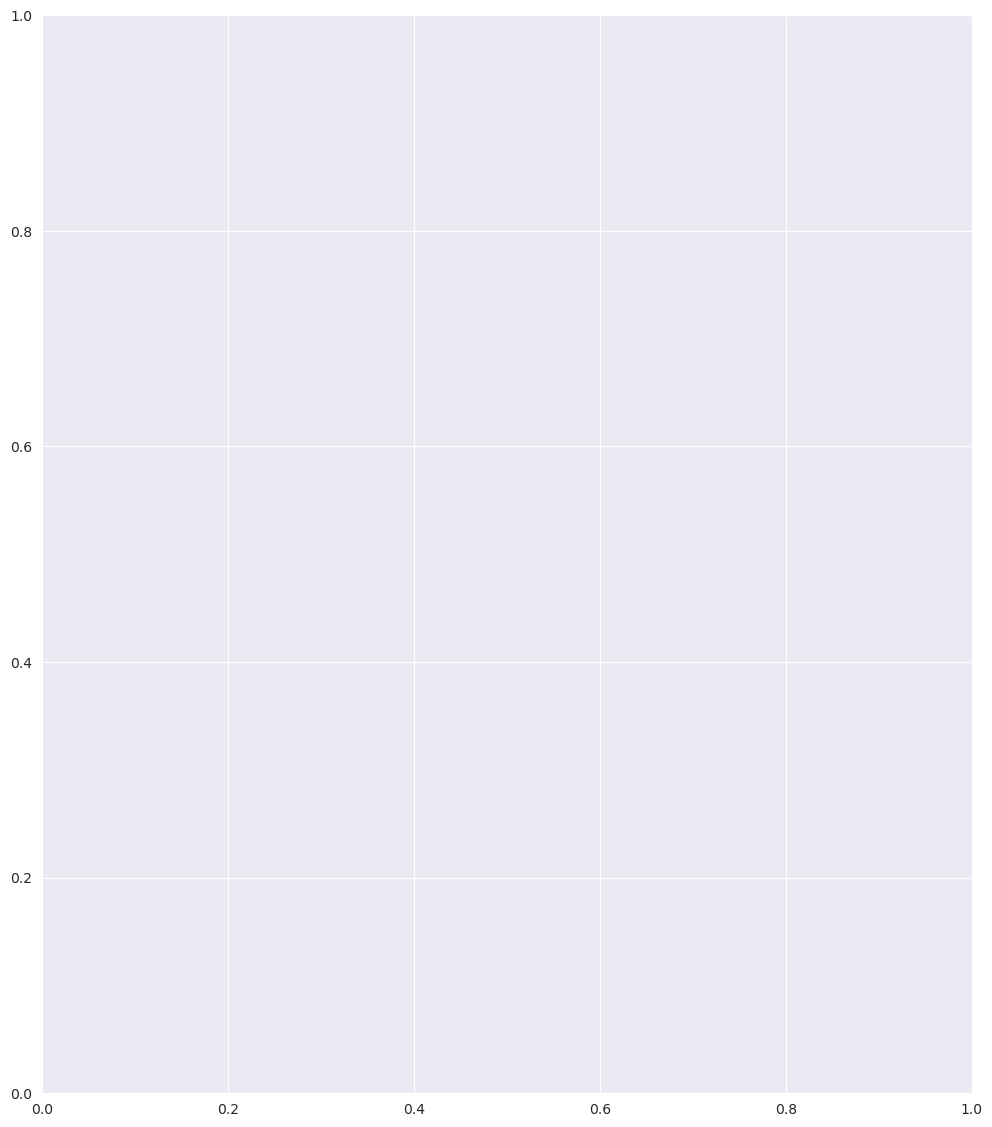

: 

: 

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Extract only the values from edge_colors and ensure they are normalized between 0 and 1
cur_edge_colors = np.clip(list(edge_colors.values()), 0, 1)

# Convert normalized values to RGBA using the colormap
cmap = plt.cm.viridis
rgba_colors = [cmap(val) for val in edge_colors]  # Converts each float to an (r, g, b, a) tuple

# Plot
plt.figure(figsize=(12, 14))
nx.draw_networkx_edges(
    nx_graph,
    pos=dataset.target_graph.pos.numpy(),
    edge_color=rgba_colors,
    width=edge_widths
)
nx.draw_networkx_nodes(
    nx_graph,
    pos=dataset.target_graph.pos.numpy(),
    node_color="gray",
    node_size=10
)

# Add colorbar manually
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=plt.gca(), label="Normalized Relative Error")

plt.title("Network with Edges Colored by Normalized Relative Error")
plt.axis("off")
plt.show()


/tmp/ipykernel_4182698/2750225346.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("RdYlGn", 256)  # Red to Green colormap


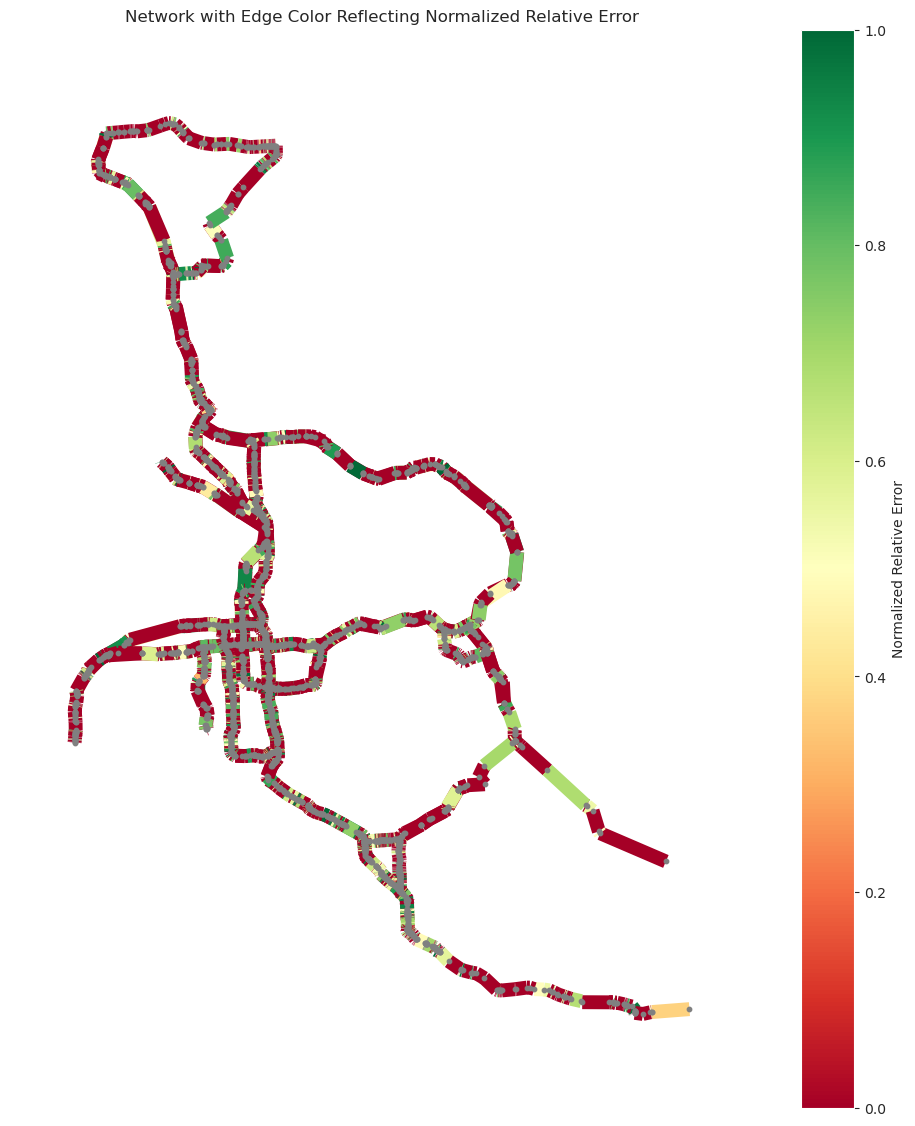

: 

: 

: 

In [ ]:
# Normalize and map edge_colors to RGBA
edge_colors = np.clip(edge_colors, 0, 1)
# cmap = plt.cm.viridis
# read and green colors
cmap = plt.cm.get_cmap("RdYlGn", 256)  # Red to Green colormap
rgba_colors = [cmap(val) for val in edge_colors]  # Convert to RGBA tuples

# Plot
fig, ax = plt.subplots(figsize=(12, 14))

nx.draw_networkx_edges(
    nx_graph,
    pos=dataset.target_graph.pos.numpy(),
    edge_color=rgba_colors,
    width=10.0,  # Increased width for thicker edges
    ax=ax
)

nx.draw_networkx_nodes(
    nx_graph,
    pos=dataset.target_graph.pos.numpy(),
    node_color="gray",
    node_size=10,
    ax=ax
)

# Colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax, label="Normalized Relative Error")

plt.title("Network with Edge Color Reflecting Normalized Relative Error")
plt.axis("off")
plt.show()


In [ ]:
# Define your MATSim projection CRS (adjust as needed!)
matsim_crs = "EPSG:5070"  # NAD83 / Conus Albers (example)

# Step 1: Convert node positions into GeoDataFrame with MATSim CRS
import geopandas as gpd
from shapely.geometry import Point, LineString

# Get node positions
pos = dataset.target_graph.pos.numpy()
nodes = list(nx_graph.nodes)
node_geoms = [Point(pos[i]) for i in nodes]
gdf_nodes = gpd.GeoDataFrame(geometry=node_geoms, crs=matsim_crs)

# Step 2: Convert edges
edges = []
for u, v in nx_graph.edges():
    edges.append(LineString([Point(pos[u]), Point(pos[v])]))
gdf_edges = gpd.GeoDataFrame(geometry=edges, crs=matsim_crs)

# Step 3: Reproject to Web Mercator (EPSG:3857) for basemap overlay
gdf_nodes = gdf_nodes.to_crs(epsg=3857)
gdf_edges = gdf_edges.to_crs(epsg=3857)


ModuleNotFoundError: No module named 'contextily'

In [ ]:
edges = []
for u, v in nx_graph.edges():
    point_u = Point(pos[u])
    point_v = Point(pos[v])
    edges.append(LineString([point_u, point_v]))

gdf_edges = gpd.GeoDataFrame(geometry=edges, crs="EPSG:4326")
gdf_edges = gdf_edges.to_crs(epsg=3857)


: 

: 

: 